<a href="https://colab.research.google.com/github/ClaretWheel1481/Artificial-Intelligence/blob/main/03_%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

plt.ion()

In [ ]:
# 保证每次生成的随机数一致
torch.manual_seed(10)

# 随机生成两个特征
x1 = torch.rand(200) * 2
x2 = torch.rand(200) * 2

In [ ]:
# 两个特征组合确定一个数据样本点在二维平面的位置
data = zip(x1,x2)

In [ ]:
# 将200个样本分成两类。根据纵坐标和横坐标的大小区分
pos = []
neg = []

for i in data:
  if(i[1] - i[0] < 0):  # 纵坐标小于横坐标
    pos.append(i)
  else:
    neg.append(i)

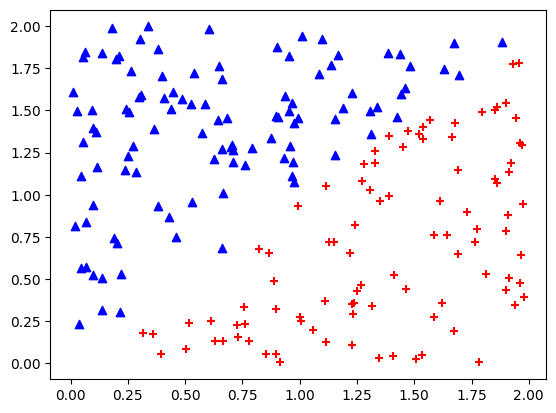

In [ ]:
pos_x = [i[0] for i in pos]
pos_y = [i[1] for i in pos]
neg_x = [i[0] for i in neg]
neg_y = [i[1] for i in neg]

plt.scatter(pos_x,pos_y,c='r',marker='+')
plt.scatter(neg_x,neg_y,c='b',marker='^')
plt.show()

In [ ]:
# 将正例设置为1，负例设置为0
x_data = [[i[0],i[1]] for i in pos]
x_data.extend([[i[0],i[1]] for i in neg])
x_data = torch.Tensor(x_data)

In [ ]:
y_data = [1 for i in range(len(pos))]
y_data.extend([0 for i in range(len(neg))])
y_data = torch.Tensor(y_data).view(-1,1)

In [ ]:
class Logical_Regression(torch.nn.Module):
  def __init__(self):
    super(Logical_Regression,self).__init__()
    # 实现线性回归
    self.linear = torch.nn.Linear(2,1)

    # sigmoid函数
    self.sigmoid = torch.nn.Sigmoid()

  def forward(self,x):
    a = self.linear(x)
    out = self.sigmoid(a)
    return out

# **模型配置**

In [ ]:
model = Logical_Regression()
criterion = torch.nn.BCELoss()  # 二分类交叉熵损失函数
optimizer = torch.optim.SGD(model.parameters(),lr=0.01) # 梯度下降算法

# **训练模型**

In [ ]:
for epoch in range(5001):  # 数据会被训练5000次
  # 得到模型预测结果
  y_pred = model(x_data)

  # 计算损失值
  loss = criterion(y_pred,y_data)

  # 梯度清零
  optimizer.zero_grad()

  # 反向传播
  loss.backward()

  # 更新参数
  optimizer.step()

  # 每隔500个epoch，输出一次训练结果
  if epoch % 500 == 0:
    print(f'epoch:{epoch},loss:{loss.item()}')

  plt.scatter(pos_x,pos_y,c='r',marker='+')
  plt.scatter(neg_x,neg_y,c='b',marker='^')

  # 绘制边界线
  w = model.linear.weight[0]
  b = model.linear.bias.item()
  w1 = w[0]
  w2 = w[1]

  # x = torch.arange(0,3).view(-1,1)
  # y = (-w1 * x - b) /w2

  # plt.plot(x.detach().numpy(),y.detach().numpy())

  # 在该模块中不会计算梯度
  with torch.no_grad():
    x = torch.arange(0,3).view(-1,1)
    y = (-w1 * x - b) /w2
    plt.plot(x.numpy(),y.numpy())

  # 限制横纵坐标的范围
  plt.xlim(0,2)
  plt.ylim(0,2)

  plt.pause(0.01)